In [1]:
from qiskit import QuantumCircuit, Aer, transpile
from numpy import pi
#This code is a case for QFT

In [4]:
def qft(qc):
 O_h_count = 0
 O_cp_count = 0 
 O_swap_count = 0  
 qc.x(1)
 for i in range(qc.num_qubits - 1, -1, -1):
     qc.h(i)
     O_h_count +=1
     for j in range(i - 1, -1, -1):
         qc.cp(pi / 2 ** (i - j), j, i)
         O_cp_count+=1
 for i in range(qc.num_qubits // 2):
     qc.swap(i, qc.num_qubits - i - 1)#reversing the order of qubits
     O_swap_count+=1
 print("The total number of qbits is :", qc.num_qubits)
 print("The Times of H gate is :", O_h_count)
 print("The Times of cp gate is :", O_cp_count)
 print("The Times of swap is :", O_swap_count)
 return qc

The total number of qbits is : 2
The Times of H gate is : 2
The Times of cp gate is : 1
The Times of swap is : 1


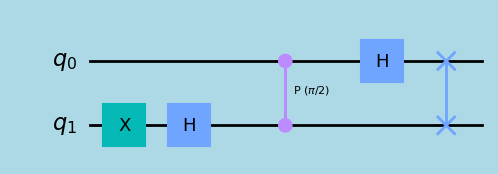

In [8]:
n_qubits = 2
qc = QuantumCircuit(n_qubits)
qc = qft(qc)
style = {'backgroundcolor': 'lightblue'}
qc.draw("mpl", style=style)
#print(qc)

In [9]:
backend = Aer.get_backend('statevector_simulator')
tqc = transpile(qc, backend)
job = backend.run(tqc)
sv = job.result().get_statevector(tqc)
sv.draw('latex')
#it is same as PPT showed!

<IPython.core.display.Latex object>

QFT 的时间复杂度为 O(n^2)